Project 4. Wrangle and Analyze Data - WeRateDOgs

TABLE OF CONTENTS

I.Introduction

II.Gathering Data

III.Assesing Data

IV.Cleaning Data

V.Visualyzing Data

I. Introduction

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. 


II. Gathering data

I wil gather data from  the following datasets:

1.Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets provided by Udacity: twitter_archive_enhanced.csv

2.Data via the Twitter API 

I tried to gather data via Twitter (X) API. I went through all the necessary steps (see the commented codes below). I have learned on the way, that due to the change of conditions for the Twitter (X) developer free account I wouldn't be able to use API as you cannot use the Search Tweets feature using the Free Level Access on the Twitter API.
More information: https://developer.twitter.com/en/docs/twitter-api
 
In this case, I decided to continue with the project working on Udacity JSON file provided for those who choose to access the Twitter data without actually creating a Twitter account. 
However, I wouldn't be able to keep track of tweets provided by Udacity that have been deleted (as to do this I would need API access).
All the coding steps leading me to this decision, are kept in the Jupyter notebook in the commented sections.

3.Additional data for the 3000 most recent tweets: tweet image predictions:image_predictions.tsv downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

4.Udacity json file for retweet count and favorite count: tweet_json.txt downloaded programmatically using the Requests library and the following URL: https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt

GATHER

First, we will import the Python libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import os
import json
import re
import time
from timeit import Timer
import warnings
from IPython.display import Image
from functools import reduce
import datetime
import statsmodels.api as sm

No, we will download and read to dataframe the twitter (X) archive csv files provided by Udacity

In [2]:
#read WeRateDogs X Archive csv file
x_archive = pd.read_csv('twitter-archive-enhanced.csv')
#check
x_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


 We will use URL provided by Udacity to download the data of the second dataset and read it into a dataframe programatically.

In [3]:
# Download Tweet image predictions file from the provided URL file using the Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#check
response

<Response [200]>

We will save the the data into csv file

In [4]:
# Save the file
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

The Twitter (X) archive provided by Udacity does not contain all of the necessary data (retweet and favorite counts). I tried to:
- use the Twitter API to read each tweet's JSON data into its own line in a TXT file. 
- read this file line by line to create a dataframe with retweet and favorite counts. 

(As confidential, the consumer_key, consumer_secret, access_token, and access_secret have been replaced here by generic strings).

Please see the commented codes below. 


In [5]:
#check for Twitter succesful authentication (the result was: 'Successful Authentication')
#api_key = "ixxxxxxxxxxxxxxxxxxxxxxxs"
#api_secret = "Uxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxf"
#access_token = "1xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxT"
#access_secret = "cxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxW"

# Authenticate to Twitter
#auth = tweepy.OAuthHandler(api_key, api_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)

#try:
#    api.verify_credentials()
#    print('Successful Authentication')
#except:
#    print('Failed authentication')

In [6]:
# Check for status
#As confidential, the consumer_key, consumer_secret, access_token, and access_secret have been replaced here by generic strings.
#api_key = 'ixxxxxxxxxxxxxxxxxxxxxxxs'
#api_secret = 'Uxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxf'
#access_token = '1xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxT'
#access_secret = 'cxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxW'
#auth = tweepy.OAuthHandler(api_key, api_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)


#Testing 1
#tweet = api.get_status(Tweet_id, tweet_mode='extended')
#print(tweet['text'])

#Testing 2
#for tweet_id in x_archive.tweet_id:
#    print(tweet_id)
#    tweet_response = api.get_status(tweet_id, tweet_mode='extended')
#    tweet_info = tweet_response._json  
#    break
#tweet_info

# I am getting API access error here.


From I have learned, Twitter Free Developer Account access rules has changed lately.
You cannot use the Search Tweets feature using the Free Level Access on the Twitter API.
More information: https://developer.twitter.com/en/docs/twitter-api

In this case, we will use Udacity off-line recources starting from copy-pasting and hashtagging the first part of code with API key and tokens

In [7]:
#Udacity code
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = x_archive.tweet_id.values
#len(tweet_ids)


In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet-json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
##end = timer()
##print(end - start)
#print(fails_dict)

Now, we will read the json file provided by Udacity line by line to create a dataframe with tweet_id, favorite_count, retweet_count, retweet status and url

In [9]:
#Read json file provided by Udacity line by line to create a dataframe with tweet id, 
#favorite count, retweet count, retweet status and url.
temp = []
import json 

with open('tweet-json.txt', encoding='utf-8') as js_file:
    for i in js_file:
        data = json.loads(i)
        tweet_id = data['id']
        tweet = data['full_text']
        url1 = tweet[tweet.find('https'):]
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']  
        retweet_status = data['retweet_status'] = data.get('retweet_status', 'Original tweet')
        if retweet_status == 'Original tweet':
            url = url1
        else:
            retweeted_status = 'A retweet'
            url = 'A retweet'
        
    
        temp.append({'tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_status': retweet_status,
                     'url': url,'retweet_count': retweet_count})

#create a new DataFrame 
df_new = pd.DataFrame(temp, columns = ['tweet_id', 'favorite_count','retweet_count', 'retweet_status', 'url'])
                                          
#check                                                           
#df_new.head()

#download file to csv
df_new.to_csv('tweet_json_n.txt', index=False)

We will read the csv file and store it in th tweet_data dataframe

In [10]:
#read the new csv file and store it in tweet_data dataframe
tweet_data = pd.read_csv('tweet_json_n.txt')

In [11]:
#check
tweet_data.head()

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f


ASSESSING DATA

After gathering the three pieces of data, I will:
- assess them visually and programmatically for quality and tidiness issues
- detect and document at least eight (8) quality issues and two (2) tidiness issues

I will use two types of assessment:

1. Visual assessment: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data will be additionally assessed in an external application (here: text editor).
2. Programmatic assessment: pandas' functions and methods are used to assess the data.

VISUAL ASSESSMENT

In [12]:
x_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
tweet_data

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f
...,...,...,...,...,...
2349,666049248165822465,111,41,Original tweet,https://t.co/4B7cOc1EDq
2350,666044226329800704,311,147,Original tweet,https://t.co/DWnyCjf2mx
2351,666033412701032449,128,47,Original tweet,https://t.co/y671yMhoiR
2352,666029285002620928,132,48,Original tweet,https://t.co/r7mOb2m0UI


Visual assessment of the dataframes:

x_archive: 
1. Instead of separate columns for each type ('doggo','floofer', 'pupper','puppo'). It should be combined into one column 'Dog Type' . 
2. Some names in the name column are missing, and some appear to be incorrect (for example, there is a name 'a' which would be rather unusual as a dog's name.

predictions: 
1. The data for prediction 1, prediction 2, and prediction 3 are spread out over several columns. There should be one column with the prediction number and the additional columns with the actual prediction, confidence, and whether the prediction is type of dog breed. 
3. Columns p1, p2, and p3: the capitalization needs to be unified.
4. To check: there are predictions (like paper-towel or spatula) which are not 'dog'. Are there records with all three predictions that are not 'dog'? if yes, they should be probably ignored in this analysis.
5. To check: the dashes and underscores in prediction columns - would it cause any problems or should it stay the way it is.  

tweet_data
1. The data looks clean

PROGRAMMATICAL ASSESSMENT:

x_archive

We will start with info() to find out the potential issues like null values or data types

In [15]:
x_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

To keep in mind for Assessment Summary: 
The timestamp column has Dtype 'object' while it should be datetime, 
The dog type should be rather a categorical Dtype, 
x_archive contains retweets, which should be deleted as first: we focus on the original content from WeRateDogs, second: it might confuse the results (the same urls)

There are retweets in the x_archive which most probably have the same url what can cause confusion.
We will need to correct it later.

In [16]:
# We will filter rows from a DataFrame x_archive
# where the columns 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' 
# are not null, and then we will calculate the length of the resulting DataFrame
#to check the number of rows where these three columns are filled. 
#If they are all in the same rows, the resulting number should be 181 (the number of non-null values for each
#of the columns)

filtered_archive = x_archive[(x_archive['retweeted_status_id'].notnull()) & 
                             (x_archive['retweeted_status_user_id'].notnull()) & 
                             (x_archive['retweeted_status_timestamp'].notnull())]
length_of_filtered_archive = len(filtered_archive)

length_of_filtered_archive

181

The above result confirms that the values are in the same rows 

We have a column with expanded urls.
I needed to check (Google search) what an expanded url is in order to decide if the column should stay in the final dataframe. 
An expanded URL is the full, original URL that a shortened URL or a redirection link resolves to. 
It reveals the actual destination of these shortened links, so that you know exactly where you're being directed 
For safety and transparency of user's web browsing experience, this column is important. 
Let's have a closer look on the urls and to what content they realte by sampling the column randomly


I want to see the whole expanded url so first I will set display options. Then, I will use sample() to randomly desplay examples of expanded_urls

In [17]:
# Set display options to show the full content in a column
pd.set_option('display.max_colwidth', None)

In [18]:
#give 10 random samples from the x_archive expanded_urls column
x_archive['expanded_urls'].sample(5)

144                                                                     https://twitter.com/dog_rates/status/863907417377173506/photo/1,https://twitter.com/dog_rates/status/863907417377173506/photo/1
2041                                                                                                                                    https://twitter.com/dog_rates/status/671542985629241344/photo/1
1281    https://twitter.com/dog_rates/status/708810915978854401/photo/1,https://twitter.com/dog_rates/status/708810915978854401/photo/1,https://twitter.com/dog_rates/status/708810915978854401/photo/1
433     https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1
1235    https://twitter.com/dog_rates/status/712668654853337088/photo/1,https://twitter.com/dog_rates/status/712668654853337088/photo/1,https://twitter.com/dog_rates/status/712668654853337088/photo/1


Looks like mostly these urls are related to photo/video content. 
I am curious, however, if there are links related to different content. Let's check

In [19]:
# Check for URLs that do not contain 'photo' or 'video' and are not null
# Filter for non-null URLs that do not contain 'photo' or 'video'
filtered_urls = x_archive[x_archive['expanded_urls'].notnull() & 
                          ~x_archive['expanded_urls'].str.contains('photo|video', case=False, na=False)]

# Display the filtered URLs
filtered_urls['expanded_urls']

32      https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873
35                                                          https://twitter.com/4bonds2carbon/status/885517367337512960
42                                                          https://twitter.com/kaijohnson_19/status/883965650754039809
72                                                               https://twitter.com/bbcworld/status/878599868507402241
83                                                            https://twitter.com/mpstowerham/status/876162994446753793
                                                             ...                                                       
1807                                                                                      https://vine.co/v/imJ0BdZOJTw
1818                                                                                      https://vine.co/v/eEQQaPFbgOY
1834                                    

I am not sure to what exactly these URLs relate. Let's check how many of such results we have in the column to decide if it should concern us in this project.

In [20]:
#check how many urls which do not contain 'photo', 'video' and are not null we have
num_urls = len(filtered_urls)
num_urls

138

In [21]:
#check how many urls (no null) we have in the column in genera
total_urls = len(x_archive[x_archive['expanded_urls'].notnull()])
total_urls

2297

In [22]:
# Calculate the percentage for those records that do not contain 'photo' or 'video' and are not null
percentage_filtered = (num_urls / total_urls) * 100
percentage_filtered

6.007836308228123

The urls related to something different than photo or video makes  6% of total, so it is realtively small. For this project, we will keep this column as it is. We will just remove rows with null values for clarity.
Let's check how many null values is in the column.

In [23]:
#number of null values in x_archive expanded_urls column
null_count_expanded_urls = x_archive['expanded_urls'].isnull().sum()
null_count_expanded_urls

59

We will need to remove the rows with missing values though

As inconsistences has been noticed in visual assessment, we will check for common values in x_archive 'name' column

In [24]:
#value count for x_archive
x_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

For the Assessment Summary: 
    None should be replaced by NaN for clarity (even if there is a small chance that people name their dog 'NONE' ;))  
    The names should start with a upper case so let's check if there are values in 'name' column starting with a lower case

In [25]:
#find and count the values starting with the lowercase as there is a high possibilty that these won't be names
#I will use Python's regular expression RegEx (based on Stackoverflow advice:
#https://stackoverflow.com/questions/18307551/regex-pattern-to-find-all-lowercase-words
#and the Datacamp Cheat Sheet)
x_archive[x_archive['name'].str.contains(r'^[^A-Z].*$')]['name'].value_counts()


a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

For the Asssessment Summary: This finding could be investigated more deeply, 
but for the needs of this project, it is safe to conclude that these values are not valid as names

We will check if there are duplicated values in x_archive

In [26]:
#check for duplicated values
sum(x_archive.duplicated())

0

We will check for tendencies and shape of dataset distribution. 

In [27]:
#check for tendencies and shape of dataset distribution. 
#I'll keep in mind that, as advised by Udacity,the fact that the rating numerators are greater than the denominators 
#does not need to be cleaned and that this unique rating system is a big part of the popularity of WeRateDogs.
x_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


2.Predictions assessment:

We will start with info() and then: check for duplicated values and check the data distribution using describe()

In [28]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


No null values
datatypes are correct

In [29]:
#check for null values, just to be sure
predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
#check for duplicated values
sum(predictions.duplicated())

0

In [31]:
 #check for any duplicated tweet_id, and jpg_url, which are the images being used for the predictions

In [32]:
sum(predictions.duplicated('tweet_id'))

0

In [33]:
sum(predictions.duplicated('jpg_url'))

66

The most possible explanation for the duplicted jpg_url is that these are retweets
Let's check the number of retweets between the duplicated urls

In [34]:
#check the number of retweets between the duplicated urls
duplicated_jpg_url = predictions[predictions.duplicated('jpg_url')]['tweet_id']
x_archive.query('tweet_id in @duplicated_jpg_url')['retweeted_status_id'].count()

66

For the Assessment Summary: as assumed initially, the duplicated jpg_url should be removed from the predictions table

In [35]:
#check the data distribution
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


The result looks normal

I assume that at least one of the three predictions needs to be 'dog'. Otherwise, the record has no value for this analysis 

In [36]:
#Check for the records where all three predictions are NOT 'dog'
predictions.query('p1_dog==False & p2_dog==False & p3_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


For Assessment Summary: we should probably remove these records 

Based on earlier visual assessment, I will have a closer look on dashes and underscores in p1, p2 and p3 columns. 

In [37]:
#check for records with underscores and dashes
predictions[predictions['p1'].str.contains('-')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
26,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,0.173810,True
36,666447344410484738,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True
66,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,soft-coated_wheaten_terrier,0.318981,True,Lakeland_terrier,0.215218,True,toy_poodle,0.106014,True
102,667801013445750784,https://pbs.twimg.com/media/CUSBemVUEAAn-6V.jpg,1,flat-coated_retriever,0.508392,True,Chesapeake_Bay_retriever,0.262239,True,curly-coated_retriever,0.048920,True
128,668274247790391296,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,1,soft-coated_wheaten_terrier,0.406374,True,Lakeland_terrier,0.263854,True,toy_poodle,0.150844,True
141,668567822092664832,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-Tzu,0.985649,True,Lhasa,0.007078,True,Pekinese,0.003053,True
220,670086499208155136,https://pbs.twimg.com/media/CUygHhFXAAAwNXv.jpg,1,German_short-haired_pointer,0.273492,True,Staffordshire_bullterrier,0.132944,True,bluetick,0.124562,True
230,670408998013820928,https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg,1,ping-pong_ball,0.999945,False,tennis_ball,0.000018,False,racket,0.000015,False


In [38]:
predictions[predictions['p2'].str.contains('-')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,0.582330,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True
148,668633411083464705,https://pbs.twimg.com/media/CUd2ieCUcAAexyT.jpg,1,Pekinese,0.589011,True,Shih-Tzu,0.390987,True,Japanese_spaniel,0.003310,True
185,669359674819481600,https://pbs.twimg.com/media/CUoLEG3XAAE65I0.jpg,1,Labrador_retriever,0.367818,True,German_short-haired_pointer,0.280642,True,Chesapeake_Bay_retriever,0.184246,True
271,670823764196741120,https://pbs.twimg.com/media/CU8-puBWwAAR8Xl.jpg,1,Labrador_retriever,0.947453,True,German_short-haired_pointer,0.017001,True,Weimaraner,0.015432,True
286,671151324042559489,https://pbs.twimg.com/media/CVBokRSWsAADuXx.jpg,1,Rottweiler,0.781201,True,black-and-tan_coonhound,0.061206,True,kelpie,0.048856,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1823,834931633769889797,https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg,1,ice_bear,0.330573,False,soft-coated_wheaten_terrier,0.196476,True,Irish_terrier,0.073096,True
1878,846153765933735936,https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg,1,giant_schnauzer,0.346468,True,flat-coated_retriever,0.218451,True,Labrador_retriever,0.108020,True
1985,872261713294495745,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,Labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True
1994,874057562936811520,https://pbs.twimg.com/media/DCFGtdoXkAEsqIw.jpg,1,flat-coated_retriever,0.832177,True,black-and-tan_coonhound,0.040437,True,Newfoundland,0.028228,True


In [39]:
predictions[predictions['p3'].str.contains('-')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,8.208610e-02,True
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,1.738100e-01,True
31,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,1.116870e-03,True
70,667192066997374976,https://pbs.twimg.com/media/CUJXpRBXIAAN0yz.jpg,1,Rottweiler,0.283640,True,miniature_pinscher,0.148112,True,black-and-tan_coonhound,9.558480e-02,True
76,667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,1.571400e-04,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1906,852311364735569921,https://pbs.twimg.com/media/C9QEqZ7XYAIR7fS.jpg,1,barbell,0.971581,False,dumbbell,0.028418,False,go-kart,5.595040e-07,False
1962,866686824827068416,https://pbs.twimg.com/media/DAcXEWuXkAIBDGJ.jpg,1,flat-coated_retriever,0.514730,True,groenendael,0.306407,True,curly-coated_retriever,6.131410e-02,True
1989,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,9.286140e-02,True
2029,882762694511734784,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,1.557940e-02,True


For the Assessment Summary: looks like the dashes are used in dog's descriptions and underscores are used in the name of the dog breed; I assume, it is safe to keep the data as it is. There is no need to change the dashes to underscores in this case (the way it is originally is even better; for example, if someone would like to split the values into two columns 'description' and 'breed', it will be easier based on the dashes and underscores)

3.tweet_data assessment 

We will use info(), isnull(), duplicated()and describe() to check for inconcistences

In [40]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   retweet_status  2354 non-null   object
 4   url             2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


The result looks good. No null values, Data types are correct

In [41]:
#check for null values, just in case
tweet_data.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
retweet_status    0
url               0
dtype: int64

In [42]:
##check for duplicated values
sum(tweet_data.duplicated())

0

In [43]:
#descriptive statistics 
tweet_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


Looks like there are tweets that have 0 favorite_count and 0 retweet_count.
Let's have a quick on the correlation between favorite_count and retweet_count

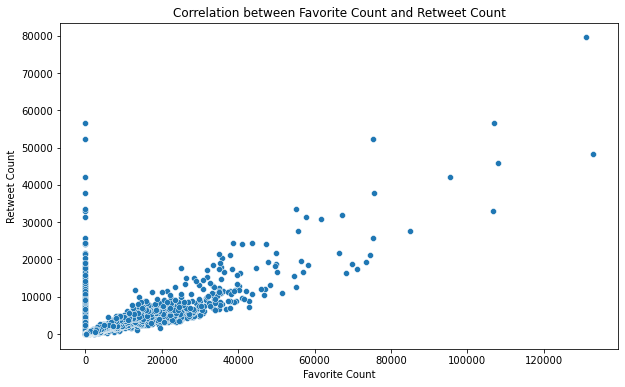

In [44]:
# Plotting the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='favorite_count', y='retweet_count', data=tweet_data)
plt.title('Correlation between Favorite Count and Retweet Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.show()

There is a positive correlation between favorite counts and retweet counts. As the number of favorites increases, the number of retweets also tends to increase.

To keep in mind for the future analysis after the data is clean and combined into single daaframe: investigate further the correlation between these two values. 

ASSESSMENT SUMMARY:
    
Tidiness:

x_archive

These columns: doggo, floofer, pupper, and puppo are not clean.
These columns should be combined into one column 'dog type'. The not valid values should be removed.

predictions

The columns that are directly related to predicion (p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog) are not clean.
These columns should be combined adequatly into columns 'prediction', 'dog_status', 'confidence'. 
After performing the above, the column 'prediction_num' should be added for clarity.


Quality:

x_archive

Timestamp should be in the datetime format
The columns (doggo, floofer, pupper, and puppo) should be in the categorical data type
Values in dogs names column should be corrected ("None", lowercase words, etc.)


predictions

The prediction confidence float should be limited to two decimal places for clarity
Ensure that the new prediction_num column has the data type int
The first letter capitalisation for values in p1, p2, and p3 should be corrected
Values in dog predictions (p1, p2, p3)  should be categorical data type (we can change it after combining into one column)
The duplicated jpg_url that are related to retweets should be deleted

tweet_data

There are 0 values in retweet_count and favorite_count
As the rows with 0 for the favorite_count are related to retweets so I assume they will be deleted anyway in the process of cleaning prediction from duplicated_urls. 
    


CLEANING DATA

We will complete the following items in Cleaning section:

Before we wil perform the cleaning, we will make a copy of the original data.

During cleaning, we will use the define-code-test framework and clearly document it.

We will merge individual pieces of data according to the rules of tidy data. 

The result will be a high-quality and tidy master pandas DataFrame.

We will start with making the copies of each dataframe

In [45]:
#make copies of each data frame
archive_clean = x_archive.copy()
predictions_clean = predictions.copy()
tweet_data_clean = tweet_data.copy()

In the next steps, we will take care of retweets and duplicated jpg_urls (which are in other word the urls of the images used for the predeictions) to focus only on the original content from WeRateDogs. Also, we don't want any confusion caused by the same urls. We will:
- remove retweets by dropping rows in archive_clean that have values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
- drop these three columns.

In [46]:
# remove retweets
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

In [47]:
# drop columns related to retweets
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [48]:
#check
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

As we assessed earlier, the duplicated jpg_urls are related to retweets do we don't want them in predictions.
We will query the rows in predictions_clean with tweet_id present in archive_clean to remove retweets. 
At the same time, the duplicated values in the jpg_url column will be removed.

In [49]:
#Query the rows
archive_clean_tweets = archive_clean['tweet_id']

In [50]:
predictions_clean = predictions_clean.query('tweet_id in @archive_clean_tweets')

In [51]:
#check
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1994 non-null   int64  
 1   jpg_url   1994 non-null   object 
 2   img_num   1994 non-null   int64  
 3   p1        1994 non-null   object 
 4   p1_conf   1994 non-null   float64
 5   p1_dog    1994 non-null   bool   
 6   p2        1994 non-null   object 
 7   p2_conf   1994 non-null   float64
 8   p2_dog    1994 non-null   bool   
 9   p3        1994 non-null   object 
 10  p3_conf   1994 non-null   float64
 11  p3_dog    1994 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 161.6+ KB


In [52]:
#check
test = predictions.query('p1_dog == False')
test

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [53]:
#confirm the duplicated jpg_url are removed
sum(predictions_clean['jpg_url'].duplicated())

0

Now, we will process predictions_clean to filter out the dog_status and select the predictions with the highest confidence.

First, we will filter rows where at least one of p1_dog, p2_dog, or p3_dog is True.
We will define a function get_best_dog_prediction to evaluate each row and determine the best prediction based on the highest confidence where the dog status is True.

Then, for each tweet_id, we will determine which prediction (p1, p2, p3) has the highest confidence if it is a dog.
Next, we will create new columns dog_status, prediction, and prediction_num based on the highest confidence dog prediction.
Finally, we will remove the unnecessary columns from the final dataFrame after determining the best prediction, confidence, and dog status.

In [54]:
# Function to find the best prediction based on confidence and dog status
def get_best_dog_prediction(row):
    predictions = ['p1', 'p2', 'p3']
    confidences = ['p1_conf', 'p2_conf', 'p3_conf']
    dog_statuses = ['p1_dog', 'p2_dog', 'p3_dog']
    
    best_prediction = None
    best_confidence = -1
    best_num = None
    
    for i, (pred, conf, dog) in enumerate(zip(predictions, confidences, dog_statuses), start=1):
        if row[dog] and row[conf] > best_confidence:
            best_confidence = row[conf]
            best_prediction = row[pred]
            best_num = i
    
    return pd.Series([best_prediction, best_confidence, best_num, best_confidence > 0])

# Apply the function to each row
result = predictions_clean.apply(get_best_dog_prediction, axis=1)
result.columns = ['prediction', 'confidence', 'prediction_num', 'dog_status']

# Add the result columns to the original DataFrame
predictions_clean = predictions_clean.join(result)

# Filter to keep only rows where dog_status is True
final_predictions = predictions_clean[predictions_clean['dog_status']]

# Drop the unnecessary columns
final_predictions = final_predictions.drop(columns=['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog', 'dog_status'])

In [55]:
# Check 1
final_predictions.head(10)


,tweet_id,jpg_url,img_num,prediction,confidence,prediction_num
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,1.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,1.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,1.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,1.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,1.0
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,1.0
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,1.0
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever,0.007959,3.0
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,1.0
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,1.0


In [56]:
# Check 2 for duplicated tweet_id, just in case
duplicated_tweet_ids = final_predictions[final_predictions.duplicated(subset=['tweet_id'], keep=False)]
duplicated_tweet_ids

,tweet_id,jpg_url,img_num,prediction,confidence,prediction_num


In [57]:
#check 3
final_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 2073
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1686 non-null   int64  
 1   jpg_url         1686 non-null   object 
 2   img_num         1686 non-null   int64  
 3   prediction      1686 non-null   object 
 4   confidence      1686 non-null   float64
 5   prediction_num  1686 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 92.2+ KB


We don't need prediction_num column anymore. We will drop it.

In [58]:
# Drop the 'prediction_num' column
final_predictions.drop(columns=['prediction_num'], inplace=True)

In [59]:
#check
final_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1686 non-null   int64  
 1   jpg_url     1686 non-null   object 
 2   img_num     1686 non-null   int64  
 3   prediction  1686 non-null   object 
 4   confidence  1686 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 79.0+ KB


In [60]:
#check if there are duplicated values in all rows, just in case
duplicates = final_predictions.duplicated()
print("\nDuplicate rows:")
print(final_predictions[duplicates])



Duplicate rows:
Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, prediction, confidence]
Index: []


In [61]:
# Display the cleaned and transformed DataFrame
final_predictions.head()


,tweet_id,jpg_url,img_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


All looks good, so we can replace predictions_clean by final predictions_copy

In [62]:
#replace predictions_clean by final_predictions copy
predictions_clean = final_predictions.copy()

In [63]:
#check
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1686 non-null   int64  
 1   jpg_url     1686 non-null   object 
 2   img_num     1686 non-null   int64  
 3   prediction  1686 non-null   object 
 4   confidence  1686 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 79.0+ KB


it is We rate dogs project, so we want to keep only the records with images of dogs. In order to do so, we need to remove the records for tweet_id in archive_clean which are not present in predictions_clean.

In [64]:
# Extract tweet_id values from predictions_clean
predicted_tweet_ids = predictions_clean['tweet_id']

# Filter archive_clean to keep only rows with tweet_id present in predictions_clean
archive_clean = archive_clean[archive_clean['tweet_id'].isin(predicted_tweet_ids)]

In [65]:
#check
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1686 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   timestamp              1686 non-null   object 
 4   source                 1686 non-null   object 
 5   text                   1686 non-null   object 
 6   expanded_urls          1686 non-null   object 
 7   rating_numerator       1686 non-null   int64  
 8   rating_denominator     1686 non-null   int64  
 9   name                   1686 non-null   object 
 10  doggo                  1686 non-null   object 
 11  floofer                1686 non-null   object 
 12  pupper                 1686 non-null   object 
 13  puppo                  1686 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 197.6+ 

In [66]:
# check
print("Filtered archive_clean shape:", archive_clean.shape)
print("First few rows of the filtered archive_clean:\n", archive_clean.head())

Filtered archive_clean shape: (1686, 14)
First few rows of the filtered archive_clean:
              tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   

                   timestamp  \
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   
5  2017-07-29 00:08:17 +0000   

                                                                               source  \
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/downlo

In [67]:
#just to be sure, check if archive_clean and predictions_clean have the same amounth of the unique tweet_ids:

unique_tweet_ids_archive = archive_clean['tweet_id'].nunique()
unique_tweet_ids_predictions = predictions_clean['tweet_id'].nunique()

# Compare the number of unique tweet_ids
same_number_of_tweets = unique_tweet_ids_archive == unique_tweet_ids_predictions

# Print results
print(f"Number of unique tweet_id in archive_clean: {unique_tweet_ids_archive}")
print(f"Number of unique tweet_id in predictions_clean: {unique_tweet_ids_predictions}")
print(f"Do both DataFrames have the same number of tweet_id? {same_number_of_tweets}")

Number of unique tweet_id in archive_clean: 1686
Number of unique tweet_id in predictions_clean: 1686
Do both DataFrames have the same number of tweet_id? True


In [68]:
#to ensure the integrity of data we will add assertion with a statement if the counts don't match
#(https://docs.python.org/3/reference/simple_stmts.html) 
#(https://www.browserstack.com/guide/assert-in-python)
assert unique_tweet_ids_archive == unique_tweet_ids_predictions,"The number of unique tweet_id values does not match between archive_clean and predictions_clean."
if not same_number_of_tweets:
    print("Mismatch in the number of tweets between DataFrames:")
    print(f"archive_clean unique tweet_id count: {unique_tweet_ids_archive}")
    print(f"predictions_clean unique tweet_id count: {unique_tweet_ids_predictions}")

In [69]:
#check
predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [70]:
#check
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1686 non-null   int64  
 1   jpg_url     1686 non-null   object 
 2   img_num     1686 non-null   int64  
 3   prediction  1686 non-null   object 
 4   confidence  1686 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 79.0+ KB


In archive_clean, We will correct the values in the dog name column and combine the stage columns.

Remove the values starting with the lowecase letter as these are not names

In [71]:
# Define a condition to check for non-NaN values 
# and filter out rows where the 'name' column starts with a lowercase letter
condition = archive_clean['name'].notna() & ~archive_clean['name'].str.match('^[a-z]')

# Apply the condition to the DataFrame to keep only the rows that meet the condition
archive_clean_filtered = archive_clean[condition]

# Update the original DataFrame
archive_clean = archive_clean_filtered

# check
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None


Replace None with NaN in the 'name' column for clarity 

In [72]:
# Replace None with NaN in the 'name' column
archive_clean.loc[archive_clean['name']=='None', 'name'] = np.nan
#check
archive_clean['name']

1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
          ...   
2342         NaN
2343         NaN
2344         NaN
2351         NaN
2355         NaN
Name: name, Length: 1606, dtype: object

In [73]:
# just in case, check for remaining lowercase names
archive_clean['name'].str.extract('(^[^A-Z].*$)')[0].unique()

array([nan], dtype=object)

In [74]:
# check
# we use Set display options to show all rows and check the names. 
# pd.set_option('display.max_rows', None)

# Get the value counts of the 'name' column and display all records
name_counts = archive_clean['name'].value_counts()
print(name_counts)

Lucy          10
Charlie       10
Cooper        10
Tucker         9
Oliver         9
              ..
Klein          1
DonDon         1
Chevy          1
Philbert       1
Christoper     1
Name: name, Length: 833, dtype: int64


Some issuses are still there. Like I am not certain if naming the dog Churlie or Clybe is intentional or it is a misspelling; however, for this project, we will keep this column as it is. These are still names, so it should not affect the results of analysis.

Now we will work on archive columns: doggo, foofer, pupper, puppo. We aim for one column instead of four.

In [75]:
# Function to concatenate dog types
def concatenate_types(row):
    types = []
    for type in ['doggo', 'floofer', 'pupper', 'puppo']:
        if row[type] != 'None':  # Assuming the typess are stored as strings 'None' if no type
            types.append(type)
    return ', '.join(types) if types else None

# Apply the function to each row
archive_clean['dog_types'] = archive_clean.apply(concatenate_types, axis=1)

# Drop the original stage columns
archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

# check
print(archive_clean.head())

             tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   

                   timestamp  \
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   
5  2017-07-29 00:08:17 +0000   

                                                                               source  \
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/downl

We will check for inconsistencies such as:

Duplicate dog type values within the same dog_types entry.

Mixed case (upper and lower case) stage values.

Multiple identical stages listed.

In order to do so we will:
Create the dog_types column as previously described.

Define a function to check for inconsistencies in the dog_types column.

Apply this function to identify any rows with inconsistencies.

In [76]:
# check for inconsistencies in dog_typess column
def check_inconsistencies(row):
    if row['dog_types'] is None:
        return False
    types = row['dog_types'].split(', ')
    unique_types = set(types)
    if len(types) != len(unique_types):
        return True  # Duplicate types found
    return False

# Apply the inconsistency check function
archive_clean['inconsistencies'] = archive_clean.apply(check_inconsistencies, axis=1)

# Filter rows with inconsistencies
inconsistent_rows = archive_clean[archive_clean['inconsistencies']]

# Display the rows with inconsistencies
print(inconsistent_rows)


# Display the cleaned DataFrame
print(archive_clean.head())


Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_types, inconsistencies]
Index: []
             tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   

                   timestamp  \
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   
5  2017-07-29 00:08:17 +0000   

                                                                               source  \
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="

In [77]:
#count False and True values in 'inconsistencies' column
archive_clean['inconsistencies'].value_counts()

False    1606
Name: inconsistencies, dtype: int64

In [78]:
# Drop the 'inconsistencies' column as it's no longer needed
archive_clean.drop(columns=['inconsistencies'], inplace=True)

In [79]:
# Just to be sure the new column is clean
# display the unique values and their counts in dog_types column
unique_dog_types = archive_clean['dog_types'].value_counts()
print("\nUnique values and their counts in 'dog_types' column:")
print(unique_dog_types)


Unique values and their counts in 'dog_types' column:
pupper            159
doggo              54
puppo              21
floofer             7
doggo, pupper       7
doggo, puppo        1
doggo, floofer      1
Name: dog_types, dtype: int64


We have two values per row for 9 rows. 
For clarity, we will replace records with double values ('doggo, pupper', 'doggo, puppo', 'doggo, floofer') with 'multiple'.

In [80]:
# Change records with double values in the dog_type column to 'multiple'
archive_clean['dog_types'] = archive_clean['dog_types'].replace({
    'doggo, pupper': 'multiple',
    'doggo, puppo': 'multiple',
    'doggo, floofer': 'multiple'
})

# check
archive_clean['dog_types'].value_counts()

pupper      159
doggo        54
puppo        21
multiple      9
floofer       7
Name: dog_types, dtype: int64

In [81]:
#check
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 1 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1606 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   timestamp              1606 non-null   object 
 4   source                 1606 non-null   object 
 5   text                   1606 non-null   object 
 6   expanded_urls          1606 non-null   object 
 7   rating_numerator       1606 non-null   int64  
 8   rating_denominator     1606 non-null   int64  
 9   name                   1187 non-null   object 
 10  dog_types              250 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 150.6+ KB


We will correct the data type of Timestamp column to the datetime

In [82]:
# Convert the 'timestamp' column to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

In [83]:
#check
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 1 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1606 non-null   int64              
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1606 non-null   datetime64[ns, UTC]
 4   source                 1606 non-null   object             
 5   text                   1606 non-null   object             
 6   expanded_urls          1606 non-null   object             
 7   rating_numerator       1606 non-null   int64              
 8   rating_denominator     1606 non-null   int64              
 9   name                   1187 non-null   object             
 10  dog_types              250 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(

I remember that, as advised by Udacity,the fact that the rating numerators are greater than the denominators 
does not need to be cleaned and that this unique rating system is a big part of the popularity of WeRateDogs.
However, of pure curiosity, I would like to check how many values in the rating_numerator and rating_denominator columns have atypical format of numerator/denominator, in other words, which aren't  within a reasonable range (e.g., numerator values typically range from 0 to 100 and denominator values are typically 10)

In [84]:
#check for atypical(invalid)
atypical_ratings = archive_clean[
    (~archive_clean['rating_numerator'].between(0, 100)) |
    (archive_clean['rating_denominator'] != 10)
]

# Display atypical ratings
print("\nRows with atypical rating values:")
print(atypical_ratings)




Rows with atypical rating values:
                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265     

In [85]:
# Calculate the percentage of atypical rows
total_rows = len(archive_clean)
atypical_rows = len(atypical_ratings)
percentage_atypical = (atypical_rows / total_rows) * 100

#check
print(f"\nTotal rows in the DataFrame: {total_rows}")
print(f"Atypical rows: {atypical_rows}")
print(f"Percentage of atypical rows: {percentage_atypical:.2f}%")



Total rows in the DataFrame: 1606
Atypical rows: 15
Percentage of atypical rows: 0.93%


The number of rows with atypical (or, mathematically speaking invalid) nominator/denominator is very low. it
makes less than 1% of the whole dataframe. 

I will drop columns in_reply_to_status_id, in_reply_to_user_id, text, expanded_urls
as not useful for the use of this project

In [86]:
#remove columns: in_reply_to_status_id, in_reply_to_user_id, text, expanded_urls
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'text', 'expanded_urls'], axis=1, inplace=True)

In [87]:
#check
archive_clean.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_types
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,NaN,None


We will check if there are different sources than iPhone. If yes, we will keep this column for the analysis. if not, we will drop it.

In [88]:
#check if there are different sources than iPhone
archive_clean['source'].str.contains(r'iPhone</a>', case=False, na=False, regex=True).value_counts()

True     1578
False      28
Name: source, dtype: int64

In [89]:
#Check rows with source other than iPhone
false_rows = archive_clean[~archive_clean['source'].str.contains(r'iPhone</a>', case=False, na=False, regex=True)]
print(false_rows)

                tweet_id                 timestamp  \
270   841314665196081154 2017-03-13 15:47:01+00:00   
352   831315979191906304 2017-02-14 01:35:49+00:00   
798   772877495989305348 2016-09-05 19:22:09+00:00   
828   768970937022709760 2016-08-26 00:38:52+00:00   
882   760290219849637889 2016-08-02 01:44:48+00:00   
972   750086836815486976 2016-07-04 22:00:12+00:00   
974   750056684286914561 2016-07-04 20:00:23+00:00   
975   750041628174217216 2016-07-04 19:00:33+00:00   
976   750026558547456000 2016-07-04 18:00:41+00:00   
977   750011400160841729 2016-07-04 17:00:26+00:00   
978   749996283729883136 2016-07-04 16:00:22+00:00   
1723  680100725817409536 2015-12-24 19:00:23+00:00   
1725  680070545539371008 2015-12-24 17:00:27+00:00   
1726  680055455951884288 2015-12-24 16:00:30+00:00   
1865  675354435921575936 2015-12-11 16:40:19+00:00   
2257  667728196545200128 2015-11-20 15:36:22+00:00   
2262  667546741521195010 2015-11-20 03:35:20+00:00   
2263  667544320556335104 201

There are clients who used web  or tweet deck. It might be useful for further analysis, so we will keep it.

We will also change rename the column dog_types to dog_type as more adequate

In [90]:
#rename the column
archive_clean.rename(columns = {'dog_types':'dog_type'}, inplace = True)
#check
archive_clean.head()


,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_type
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,NaN,None


We will change dog_type column datatype to category. It might be useful for model building and plotting in the analysis, 
and leads to faster operations particularly with functions like group by 
(https://stackoverflow.com/questions/30601830/when-to-use-category-rather-than-object)
(https://pandas.pydata.org/docs/user_guide/categorical.html)

In [91]:
archive_clean.dog_type = archive_clean.dog_type.astype('category')
#check
#archive_clean.info()

In [92]:
#final check
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 1 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1606 non-null   int64              
 1   timestamp           1606 non-null   datetime64[ns, UTC]
 2   source              1606 non-null   object             
 3   rating_numerator    1606 non-null   int64              
 4   rating_denominator  1606 non-null   int64              
 5   name                1187 non-null   object             
 6   dog_type            250 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 89.6+ KB


In [93]:
#check
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 1 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1606 non-null   int64              
 1   timestamp           1606 non-null   datetime64[ns, UTC]
 2   source              1606 non-null   object             
 3   rating_numerator    1606 non-null   int64              
 4   rating_denominator  1606 non-null   int64              
 5   name                1187 non-null   object             
 6   dog_type            250 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 89.6+ KB


Dataframe archive_clean is ready

Now, we will continue with tiding the prediction_clean dataframe. The upper'lower cases in prediction column should be solved 

In [94]:
# use info() and head() to remind what still needs to be corrected in predictions_clean 
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1686 non-null   int64  
 1   jpg_url     1686 non-null   object 
 2   img_num     1686 non-null   int64  
 3   prediction  1686 non-null   object 
 4   confidence  1686 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 79.0+ KB


In [95]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


We will change all upper cases to lower cases in prediction column

In [96]:
#change all the upper cases to lower cases
predictions_clean['prediction'] = predictions_clean['prediction'].str.lower()

In [97]:
#check
predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


We will round decimal places to two in confidence column for more clarity

In [98]:
#round the prediction column values to 2 decimal places
predictions_clean['confidence'] = predictions_clean['confidence'].round(2)
#check
predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.47
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.60
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.41
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56


In [99]:
#check
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1686 non-null   int64  
 1   jpg_url     1686 non-null   object 
 2   img_num     1686 non-null   int64  
 3   prediction  1686 non-null   object 
 4   confidence  1686 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 79.0+ KB


Prediction column should have categorical datatype

In [100]:
# for the column 'prediction', change the datatype to catogory
predictions_clean.prediction=predictions_clean.prediction.astype('category')

In [101]:
#check
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tweet_id    1686 non-null   int64   
 1   jpg_url     1686 non-null   object  
 2   img_num     1686 non-null   int64   
 3   prediction  1686 non-null   category
 4   confidence  1686 non-null   float64 
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 72.5+ KB


predictions_clean dataframe is ready

3.tweet_data_clean

We will use info(), head() and describe() for the summary and data distribution of tweet_data_clean 

In [102]:
#use info() to see the summary of tweet_data_clean
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   retweet_status  2354 non-null   object
 4   url             2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [103]:
tweet_data_clean.head(10)

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f
5,891087950875897856,20562,3261,Original tweet,https://t.co/kQ04fDDRmh
6,890971913173991426,12041,2158,Original tweet,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,56848,16716,Original tweet,https://t.co/v0nONBcwxq
8,890609185150312448,28226,4429,Original tweet,https://t.co/9TwLuAGH0b
9,890240255349198849,32467,7711,Original tweet,https://t.co/t1bfwz5S2A


In [104]:
tweet_data_clean.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


The tweet_data_clean dataframe looks clean, the only issue we need to address is 0 in favorite counts. 
There are no retweets in archive_clean, so merging tweet-data_clean with archive_clean, will solve the problem with 0 favorite counts. 
We will merge archive_clean with tweet_data_clean. 

Then, we will merge the new dataframe with predictions_clean and store the result in our final master dataframe master_df

In [105]:
# Merge archive_clean and tweet_data_clean on tweet_id
master_df = pd.merge(archive_clean, tweet_data_clean, on='tweet_id', suffixes=('_archive', '_tweet'))
#check
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 0 to 1605
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1606 non-null   int64              
 1   timestamp           1606 non-null   datetime64[ns, UTC]
 2   source              1606 non-null   object             
 3   rating_numerator    1606 non-null   int64              
 4   rating_denominator  1606 non-null   int64              
 5   name                1187 non-null   object             
 6   dog_type            250 non-null    category           
 7   favorite_count      1606 non-null   int64              
 8   retweet_count       1606 non-null   int64              
 9   retweet_status      1606 non-null   object             
 10  url                 1606 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 139.8+ KB


The data_tweet_clean (stored in master_df) is clean and ready

Now, we will prepare the final Master dataframe by marging the master_df with predictions. 

In [106]:
# Merge the resulting dataframe with predictions_clean on tweet_id
master_df = pd.merge(master_df, predictions_clean, on='tweet_id')

# Display the merged DataFrame
print(master_df)


                tweet_id                 timestamp  \
0     892177421306343426 2017-08-01 00:17:27+00:00   
1     891815181378084864 2017-07-31 00:18:03+00:00   
2     891689557279858688 2017-07-30 15:58:51+00:00   
3     891327558926688256 2017-07-29 16:00:24+00:00   
4     891087950875897856 2017-07-29 00:08:17+00:00   
...                  ...                       ...   
1601  666082916733198337 2015-11-16 02:38:37+00:00   
1602  666073100786774016 2015-11-16 01:59:36+00:00   
1603  666071193221509120 2015-11-16 01:52:02+00:00   
1604  666049248165822465 2015-11-16 00:24:50+00:00   
1605  666020888022790149 2015-11-15 22:32:08+00:00   

                                                                                  source  \
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter f

In [107]:
#check
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 0 to 1605
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1606 non-null   int64              
 1   timestamp           1606 non-null   datetime64[ns, UTC]
 2   source              1606 non-null   object             
 3   rating_numerator    1606 non-null   int64              
 4   rating_denominator  1606 non-null   int64              
 5   name                1187 non-null   object             
 6   dog_type            250 non-null    category           
 7   favorite_count      1606 non-null   int64              
 8   retweet_count       1606 non-null   int64              
 9   retweet_status      1606 non-null   object             
 10  url                 1606 non-null   object             
 11  jpg_url             1606 non-null   object             
 12  img_num             1606 non-null 

In [108]:
#check 2
master_df.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count,retweet_status,url,jpg_url,img_num,prediction,confidence
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Tilly,NaN,33819,6514,Original tweet,https://t.co/0Xxu71qeIV,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.32
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Archie,NaN,25461,4328,Original tweet,https://t.co/wUnZnhtVJB,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.72
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Darla,NaN,42908,8964,Original tweet,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,0.17
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Franklin,NaN,41048,9774,Original tweet,https://t.co/AtUZn91f7f,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.56
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,NaN,NaN,20562,3261,Original tweet,https://t.co/kQ04fDDRmh,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.43


In [109]:
# Check for missing values and handle them if necessary
master_df.isnull().sum()

# Fill missing names with 'Unknown'
master_df['name'].fillna('Unknown', inplace=True)
#check
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 0 to 1605
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1606 non-null   int64              
 1   timestamp           1606 non-null   datetime64[ns, UTC]
 2   source              1606 non-null   object             
 3   rating_numerator    1606 non-null   int64              
 4   rating_denominator  1606 non-null   int64              
 5   name                1606 non-null   object             
 6   dog_type            250 non-null    category           
 7   favorite_count      1606 non-null   int64              
 8   retweet_count       1606 non-null   int64              
 9   retweet_status      1606 non-null   object             
 10  url                 1606 non-null   object             
 11  jpg_url             1606 non-null   object             
 12  img_num             1606 non-null 

In [110]:
#check2
master_df.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count,retweet_status,url,jpg_url,img_num,prediction,confidence
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Tilly,NaN,33819,6514,Original tweet,https://t.co/0Xxu71qeIV,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.32
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Archie,NaN,25461,4328,Original tweet,https://t.co/wUnZnhtVJB,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.72
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Darla,NaN,42908,8964,Original tweet,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,0.17
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Franklin,NaN,41048,9774,Original tweet,https://t.co/AtUZn91f7f,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.56
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Unknown,NaN,20562,3261,Original tweet,https://t.co/kQ04fDDRmh,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.43


The final master dataframe is ready. We will store it in a master csv file

In [111]:
#store master_df in a csv file
master_df.to_csv('twitter_archive_master.csv', index=False)

ANALYSING AND VISUALISING DATA

We will analyze and visualize the wrangled data.

We will produce at least three (3) insights and one (1) visualization.
We willl clearly document the piece of assessed and cleaned (if necessary) data used to make each analysis and visualization.

1 INSIGHT
We want to know what are the most popular dog breeds based on the number of posts, interactions by Twitter users (favorite and retweet counts), and ratings.

In order to do so we will:

Calculate dog_rating as the ratio of rating_numerator to rating_denominator.

Group by dog breed (prediction) to calculate the number of posts (num_posts), total interactions (total_interactions), average interactions (avg_interactions), and average rating (avg_rating).

To identify the 10 Most Popular Breeds in each category, we will sort the breeds by num_posts, total_interactions, and avg_rating. 

We will create bar plots to visualise the top 10 dog breeds by the number of posts, total interactions, and average rating.


In [112]:
# Calculate dog rating as the ratio of rating_numerator to rating_denominator
master_df['dog_rating'] = master_df['rating_numerator'] / master_df['rating_denominator']

In [113]:
# Group by dog breed to calculate aggregate statistics
breed_stats = master_df.groupby('prediction').agg(
    num_posts=('tweet_id', 'count'),
    total_interactions=('favorite_count', 'sum'),
    avg_interactions=('favorite_count', 'mean'),
    avg_rating=('dog_rating', 'mean')
).reset_index()

In [114]:
# Sort the breeds by different metrics to identify the most popular breeds
most_posts = breed_stats.sort_values(by='num_posts', ascending=False).head(10)
most_interactions = breed_stats.sort_values(by='total_interactions', ascending=False).head(10)
highest_avg_rating = breed_stats.sort_values(by='avg_rating', ascending=False).head(10)

# Print the results
print("Most Popular Dog Breeds by Number of Posts:")
print(most_posts)
print("\nMost Popular Dog Breeds by Total Interactions:")
print(most_interactions)
print("\nDog Breeds with Highest Average Rating:")
print(highest_avg_rating)


Most Popular Dog Breeds by Number of Posts:
             prediction  num_posts  total_interactions  avg_interactions  \
45     golden_retriever        152             1916466      12608.328947   
62   labrador_retriever        105             1255764      11959.657143   
80             pembroke         91              998942      10977.384615   
27            chihuahua         89              744039       8359.988764   
82                  pug         58              375145       6468.017241   
103          toy_poodle         47              336415       7157.765957   
28                 chow         45              437387       9719.711111   
88              samoyed         40              532566      13314.150000   
81           pomeranian         39              304066       7796.564103   
66             malamute         31              257413       8303.645161   

     avg_rating  
45     1.168729  
62     1.125714  
80     1.148352  
27     1.054341  
82     1.027586  
103    1.10

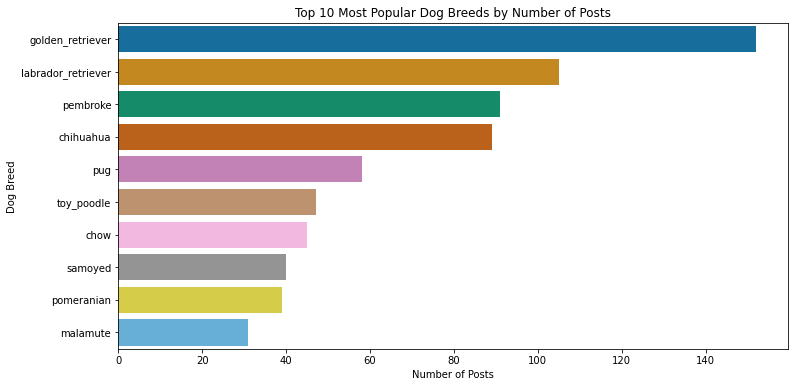

In [115]:
# Plotting the top 10 breeds by number of posts
plt.figure(figsize=(12, 6))
sns.countplot(data=master_df[master_df['prediction'].isin(most_posts['prediction'])],
              y='prediction', palette='colorblind', order=most_posts['prediction'])
plt.title('Top 10 Most Popular Dog Breeds by Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Dog Breed')
plt.show()

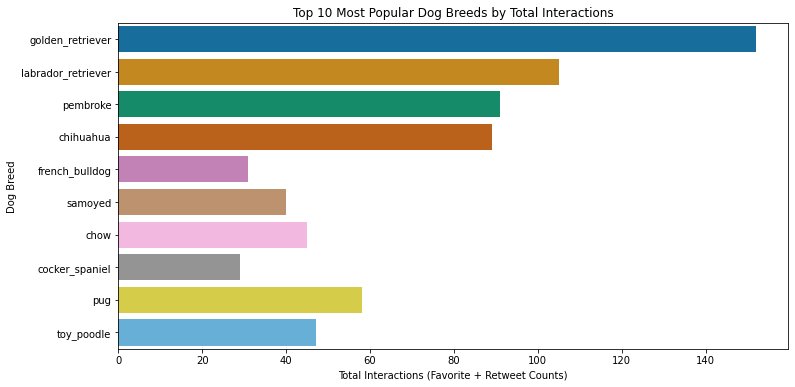

In [116]:
# Plotting the top 10 breeds by total interactions
plt.figure(figsize=(12, 6))
sns.countplot(data=master_df[master_df['prediction'].isin(most_interactions['prediction'])],
              y='prediction', palette='colorblind', order=most_interactions['prediction'])
plt.title('Top 10 Most Popular Dog Breeds by Total Interactions')
plt.xlabel('Total Interactions (Favorite + Retweet Counts)')
plt.ylabel('Dog Breed')
plt.show()

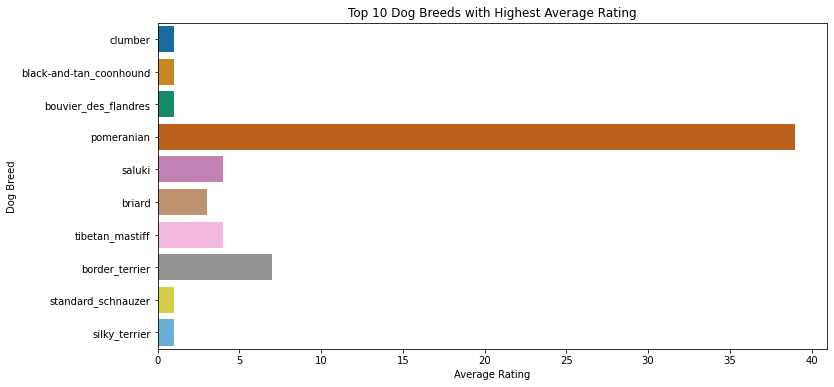

In [117]:
# Plotting the top 10 breeds by average rating
plt.figure(figsize=(12, 6))
sns.countplot(data=master_df[master_df['prediction'].isin(highest_avg_rating['prediction'])],
              y='prediction', palette='colorblind', order=highest_avg_rating['prediction'])
plt.title('Top 10 Dog Breeds with Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Dog Breed')
plt.show()

FOR THE SUMMARY:

1. Top 10 Most Popular Dog Breeds by Number of Posts:

This 
Golden Retriever is the most popular dog breed by the number of posts, significantly outpacing other breeds.

Labrador Retriever, Pembroke and Chihuahua also have a substantial number of posts.

Pug, Samoyed, Chow, Pomeranian, Toy Poodle and Malamute complete the top 10, indicating a diverse range of breeds being popular on Twitter.

2. Top 10 Most Popular Dog Breeds by Total Interactions:

Golden Retriever leads in total interactions, mirroring its popularity in the number of posts.

Labrador Retriever, Pembroke and Chihuahua also rank high in total interactions.

Pug, Samoyed, Chow, Pomeranian, French Buldog and Cocker Spaniel make up the rest of the top 10.
The engagement (favorite + retweet counts) follows a similar pattern to the number of posts, with popular breeds maintaining their high interaction rates.

3. Top 10 Dog Breeds with Highest Average Rating:

Pomeranian has the highest average ratings, followed by Kuvasz, indicating that when these breeds are posted about, they tend to receive very positive ratings.

Border Terrier, followed by Saluki, Tibetan Mastiff, Giant Schnauzer and Briard also have relatively high average ratings, suggesting strong liking or approval from Twitter users.

Silky Terrier, Dumber and Black and Tun Coonhund, round out the top 10, showing a mix of both common and rare breeds receiving high ratings.

This metric highlights breeds that might not have the highest post or interaction counts but are highly rated when they do appear.

Conclusions:

Golden Retriever (1st) and Labrador Retriever (2nd) dominate in both the number of posts and total interactions, indicating their overall popularity.

Pembroke and Chihuahua also show significant presence and engagement.

The highest average ratings feature some breeds that are not necessarily the most posted or interacted with, suggesting that specific breeds generate strong positive sentiment among those who do post about them.
These insights can be useful for understanding trends in dog breed popularity and engagement on Twitter.

2 INSIGHT What is the correlation between Favorite Counts and Retweet Counts

Correlation between favorite counts and retweet counts: 0.91


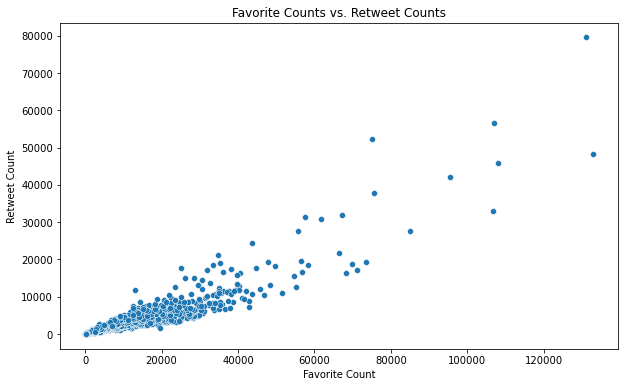

In [118]:
# Calculate correlation
correlation = master_df['favorite_count'].corr(master_df['retweet_count'])
print(f'Correlation between favorite counts and retweet counts: {correlation:.2f}')

# Plot the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='favorite_count', y='retweet_count', data=master_df)
plt.title('Favorite Counts vs. Retweet Counts')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.show()

FOR THE SUMMARY

The correlation coefficient between favorite counts and retweet counts is 0.91.

The correlation coefficient is a measure of the strength and direction of the linear relationship between two variables.
It ranges from -1 to 1:
+1 indicates a perfect positive linear relationship.
0 indicates no linear relationship.
-1 indicates a perfect negative linear relationship.


A correlation coefficient of 0.91 indicates a very strong positive linear relationship between favorite counts and retweet counts.

This means that tweets that receive a high number of favorites also tend to receive a high number of retweets, and vice versa.

In other words, as the number of favorite counts increases, the number of retweet counts also increases proportionally.

Scatter Plot Analysis:

The scatter plot visually confirms the strong positive correlation.
(The points are closely clustered along an upward-sloping line, suggesting that higher favorite counts are associated with higher retweet counts).

There are a few outliers where tweets have an exceptionally high number of favorites or retweets, but the overall trend is clearly positive.

Conclusion:

The high correlation and the scatter plot together suggest that favorite counts and retweet counts are strongly related.
When analyzing tweet popularity or engagement, both metrics are likely to move together, making either a good indicator of the other.



We want to explore the relationsip further.

We will perform a linear regression analysis to model the relationship between favorite counts and retweet counts. 

This will allow us to predict retweet counts based on favorite counts more precisely. 

Building the model:

1.Prepare the Data:

We will extract the favorite_count as the independent variable (X) and retweet_count as the dependent variable (y).

2.Add a Constant:

We will add a constant term to X using sm.add_constant(X). This is necessary to include the intercept in the regression model.

3.Fit the Model:

We will use the OLS method from statsmodels to fit the regression model.
We will call the fit method to estimate the model parameters.

4.Print the Model Summary:

The summary method will provide a detailed summary of the regression results, including the coefficients, R-squared value, p-values, and more.

5.Interpretation of the Regression Results:
The summary output will include:

Coefficients: The intercept and slope of the regression line.
R-squared: The proportion of the variance in the dependent variable that is predictable from the independent variable.
P-values: Statistical significance of the coefficients.
Standard Errors: The accuracy of the coefficients' estimates.


In [119]:
import statsmodels.api as sm

# Prepare the data
X = master_df['favorite_count']
y = master_df['retweet_count']

# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          retweet_count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     7845.
Date:                Fri, 05 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:20:29   Log-Likelihood:                -14485.
No. Observations:                1606   AIC:                         2.897e+04
Df Residuals:                    1604   BIC:                         2.898e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -429.8492     62.240     -6.

C:\Users\Manuela\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Visualise the result in a scatter plot but this time with the regresion line

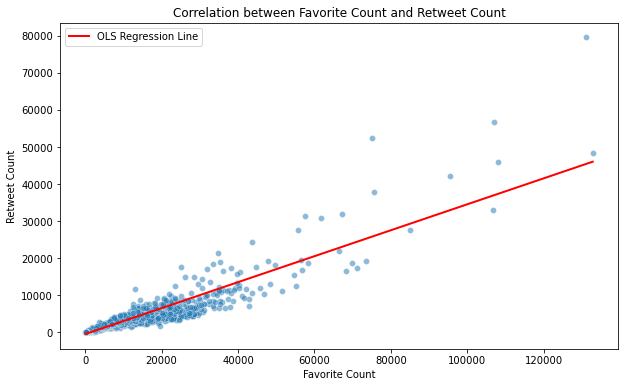

In [120]:
# Scatter plot of favorite_count vs. retweet_count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='favorite_count', y='retweet_count', data=master_df, alpha=0.5)

# Regression line from the OLS model
favorite_count_values = np.linspace(master_df['favorite_count'].min(), master_df['favorite_count'].max(), 100)
X_values = sm.add_constant(favorite_count_values)
retweet_count_pred = model.predict(X_values)

plt.plot(favorite_count_values, retweet_count_pred, color='red', linewidth=2, label='OLS Regression Line')

# Labels and title
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Correlation between Favorite Count and Retweet Count')
plt.legend()
plt.show()

FOR THE SUMMMARY:

The results of the OLS regression analysis:


Dependent Variable: retweet_count

Independent Variable: favorite_count

R-squared: 0.830 – Indicates that approximately 83% of the variance in retweet counts can be explained by favorite counts, suggesting a strong relationship.

Adjusted R-squared: 0.830 – Similarly high, confirming a strong fit.

Coefficients:

Intercept (const): -429.3492 – Predicted retweet count when favorite count is zero. While not practical (negative retweets), it indicates the baseline offset.

Slope (favorite_count): 0.3498 – For each additional favorite, retweet count increases by approximately 0.35. Highly significant with p < 0.000

Statistical Significance:

P-values: Both intercept and slope are statistically significant (p < 0.000).

T-statistics: High values confirm their significance.

Model Diagnostics:

F-statistic: 9279 with a p-value < 0.000 indicates the overall model is significant.

Durbin-Watson: 1.333 – Suggests some positive autocorrelation (values closer to 2 are ideal).

Condition Number: 1.97e+04 – Indicates potential multicollinearity or numerical stability issues, but with one predictor, this might indicate numerical issues.


Conclusion:
The regression model shows a very strong positive relationship between favorite counts and retweet counts.
For each additional favorite, retweets are expected to increase by about 0.35.
The model explains a significant portion of the variability in retweet counts (R-squared = 0.83).
Both the predictor and the overall model are statistically significant.

We could continue the analysis with this regression model by extending it by including additional predictors: like the month or the dog breed. But for this project we will stop here.

3 INSIGHT

We want to identify trends in dog ratings over time, 

We will create a time series plot. This plot will show how the average rating has changed over the years. 

We can also visualize the number of tweets over time to see if there are any patterns or trends in tweet activity.

In order to do the above we will create and interpret the visualisations:

First, we will set the timestamp as the index of the DataFrame.

Then, we will resample the data by month to get the average rating and the count of tweets.

Finally we will plot the average rating over time and the count of tweets over time.

In [121]:
# Set 'timestamp' as the index
master_df.set_index('timestamp', inplace=True)

In [122]:
# Calculate rating
master_df['rating'] = master_df['rating_numerator'] / master_df['rating_denominator']

In [123]:
# Resample by month and calculate mean rating
monthly_rating = master_df['rating'].resample('M').mean()

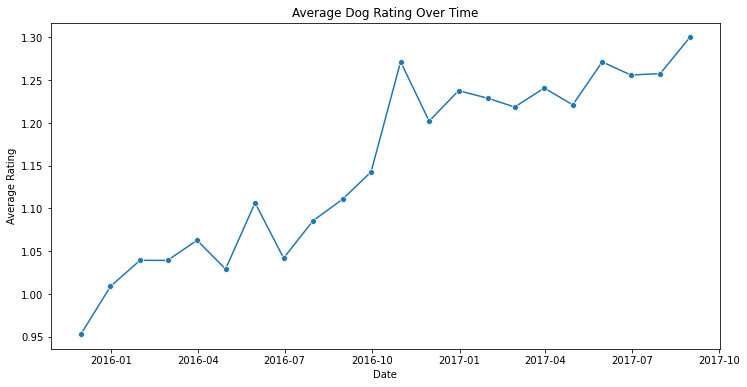

In [124]:
# Plot the average rating over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_rating, marker='o')
plt.title('Average Dog Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()

FOR THE SUMMARY:

There is a general upward trend in the average dog rating over time.

The average rating starts just below 1.00 in early 2016 and ends at about 1.30 by late 2017.

There are fluctuations inthe ratings, with notable peaks around mid-2016 and again in early 2017.
These peaks might correspond to particularly popular or highly rated dog images posted during these periods.

Conclusions:
Despite some variability, the overall trend is positive, indicating that the average ratings given by the account's followers have increased over time.
The primary purpose of Twitter account here is to post images of dogs with ratings.
The upward trend in average ratings suggests that the account's content is increasingly well-received by its audience, potentially leading to higher engagement and follower growth.
This positive trend in ratings can be interpreted as a sign of successful content strategy, with followers responding more favorably to the posts over time.


For the future reference: it might be interesting to investigate this further by building a statistical linear regression model to:
- calculate the linear trend and fit a linear regression model to see if there is a statistically significant upward trend.
- check for seasonality to Look for any periodic patterns within the data.
- calculate moving average to observe underlying trends without short-term fluctuations.
For this project, we will not contunue the investigation in this direction.

4 INSIGHT:

Based on the above result, we want to check for seasonal patterns or trends in number of tweets by breaking down the data into smaller monthly time periods. We will prepare a visualisation in order to do so.

For the future reference: it would be interesting to conduct a comparison of the average ratings with other metrics like total interactions (favorites and retweets) or the number of posts to see if there are any correlations.

In [125]:
# Resample by month and count the number of tweets
monthly_tweet_count = master_df['tweet_id'].resample('M').count()

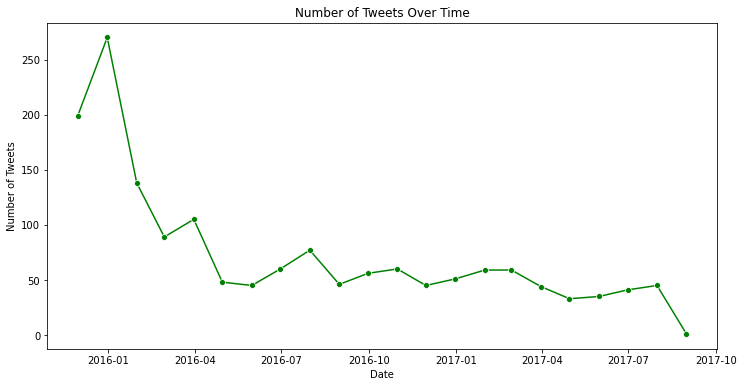

In [126]:
# Plot the count of tweets over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_tweet_count, marker='o', color='green')
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

FOR THE SUMMARY:

The Number of Tweets Over Time:

The plot shows a high number of tweets at the beginning of the observed period, particularly around early 2016, peaking at close to 300 tweets in a single month.

Following the peak, there is a sharp decline in the number of tweets over the next few months. By mid-2016, the number of tweets drops significantly to around 50 per month.

After mid-2016, the number of tweets stabilizes, fluctuating around 50 tweets per month with minor variations.
There is no significant upward or downward trend after the initial decline, indicating a period of steady activity.

Towards the end of the observed period, specifically around mid-2017, there is another noticeable decline in the number of tweets, dropping close to 0 tweets per month.

Conclusions:

There was an initial surge in the number of tweets, peaking in early 2016. This could be due to increased popularity or a specific event driving higher engagement.

The sharp decline after the peak indicates that the initial surge was not sustained. This could be due to various factors such as changes in user interest, etc.

The stabilization period indicates a consistent level of activity with around 50 tweets per month. It might be suggesting a loyal user base or stable content production.

The decline towards the end of the period might indicate a drop in engagement or content production.

All these result could be investigated further. 
For example, we could:
1.Analyze the content and context of tweets during the peak period to understand what drove the high volume of tweets.
2.Look into the content and engagement strategies during the stabilization period to understand what kept the engagement steady.
3.Investigate the factors leading to the decline in tweets towards the end of the period to identify potential areas for improvement or changes in strategy.

However, in this project, we will not investigate it further.

5 INSIGHT: 
We want to know what are the most popular dog types in the dataset.
To check it, we will prepare a visualisation for distribution of dog types.

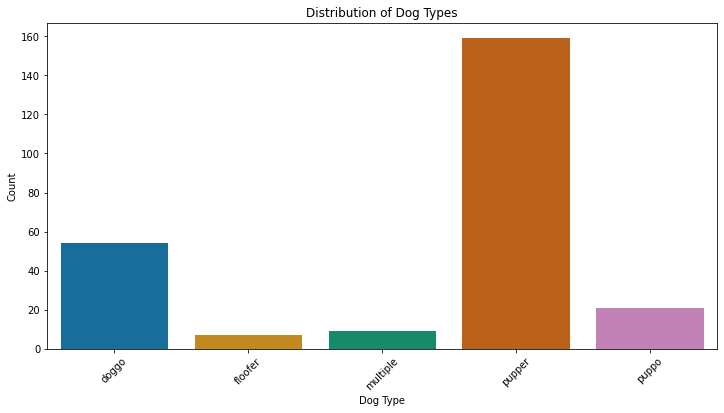

In [127]:
# Visualisation for Distribution of dog types
dog_type_counts = master_df['dog_type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=dog_type_counts.index, y=dog_type_counts.values, palette='colorblind')
plt.title('Distribution of Dog Types')
plt.xlabel('Dog Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()


FOR THE SUMMARY:

Popularity of Dog Types:
Conclusions: Dog type 'pupper' (1st) and 'doggo' (2nd) are significantly more common in the dataset, which could indicate either a bias in the data collection or genuine popularity among the Twitter users.

Credentials: 
1. I used official documentation for Python, NumPy, pandas and other libraries listed in #import libraries section.
2. https://seaborn.pydata.org/tutorial/color_palettes.html
3. https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
4. https://docs.tweepy.org/en/v3.2.0/api.html#API
5. https://developer.twitter.com/en/docs/twitter-api (to address issuess with API connection)
6. https://stackoverflow.com/questions/18307551/regex-pattern-to-find-all-lowercase-words
7. https://stackoverflow.com/questions/30601830/when-to-use-category-rather-than-object
8. https://www.statology.org/python-guides/
9. https://www.statsmodels.org/dev/regression.html
10.https://sites.google.com/udacity.com/dataanalyst-project4/home